<a href="https://colab.research.google.com/github/ayobellobia/ayobellobia-colab-git-assignment2-AA/blob/main/Lesson_6_ml_basic_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (California Housing):
* MedInc: Median income in block group
* HouseAge: Median house age in block group
* AveRooms: Average number of rooms per household
* AveBedrms: Average number of bedrooms per household
* Population: Block group population
* AveOccup: Average number of household members
* Latitude: Block group latitude
* Longitude: Block group longitude
* MedHouseVal (Target): Median house value in block group




In [1]:
# --- Task 1: Import libraries---
# Add your imports here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# ---  Task 2: Data Collection and Loading ---
# TODO: Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `fetch_california_housing()` from `sklearn.datasets`

# Load dataset and convert to DataFrame:

# Add your code here:
housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target column
df['Target'] = housing.target


In [7]:
# --- Task 3: Quick Check of Data ---
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

# Add your code here:
print("First Few Rows:\n", df.head())
# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.

# Add your code here:
print("\nData Info:")
df.info()
print("\nData Descriptive Statistics:")
display(df.describe())

First Few Rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


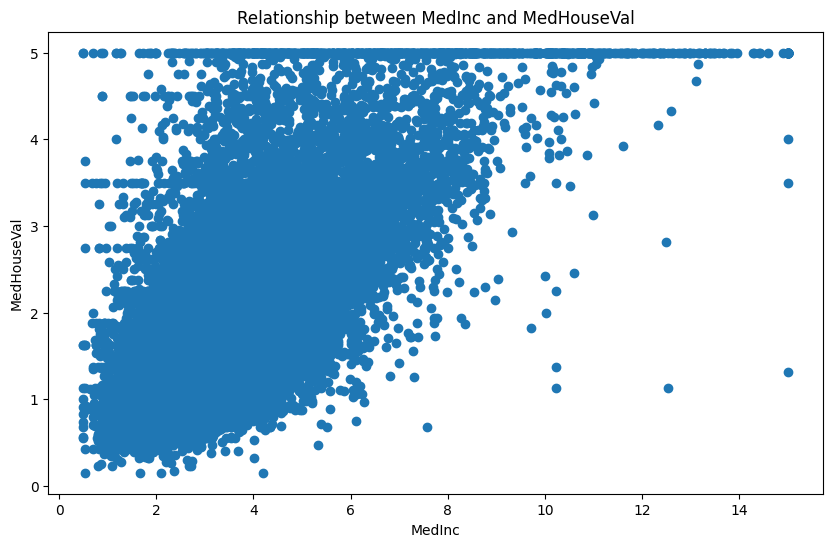

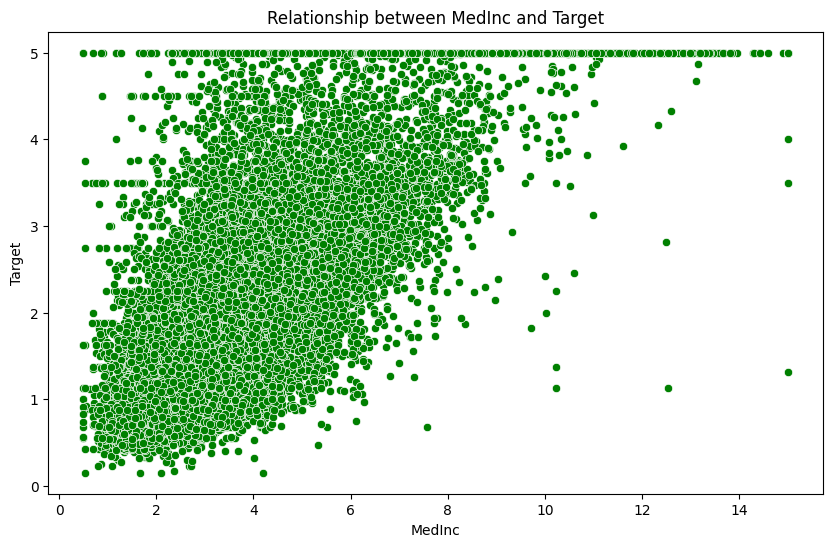

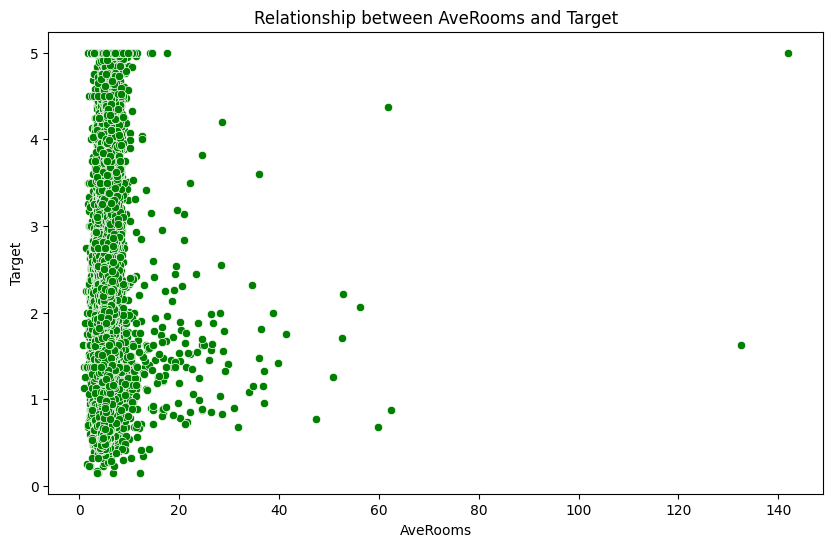

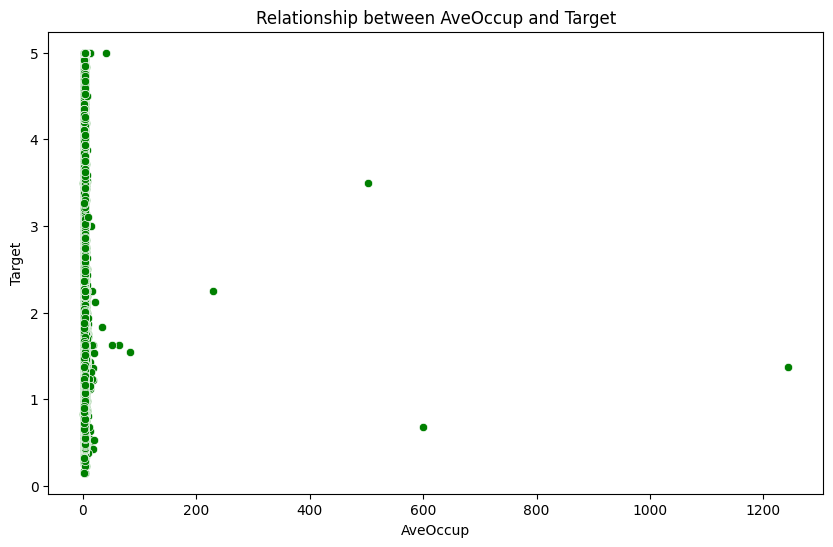

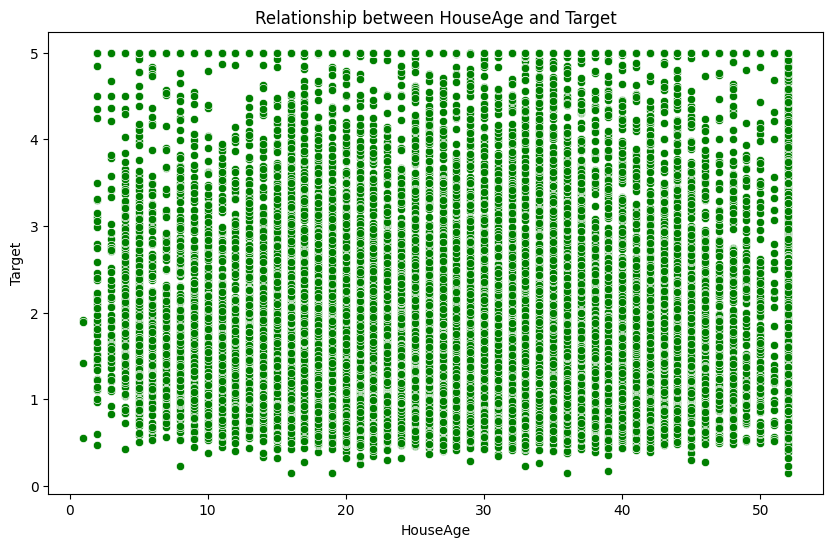

In [10]:
# --- Task 4: EDA and Data Preprocessing ---
# TODO: Check for missing/null values.
# Add your code here:
print(df.isnull().sum())

# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
# Example: Use `plt.scatter()` to visualize the relationship between 'MedInc' and 'MedHouseVal'.

# Add your code here:
plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], df['Target'])
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Relationship between MedInc and MedHouseVal')
plt.show()

# TODO: Create a function to automate scatter plots for all features vs MedHouseVal.
# Hint: The function should loop over a list of features and plot scatter plots for each.
# TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Features: ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
# Target: 'MedHouseVal'
# Define your function here:
def plot_scatter_matrix(df, target_col, feature_cols):
    for feature in feature_cols:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df[target_col], color='green') # Using seaborn.scatterplot and setting color to green
        plt.xlabel(feature)
        plt.ylabel(target_col)
        plt.title(f'Relationship between {feature} and {target_col}')
        plt.show()

# Use the function to plot scatter plots for the specified features
features_to_plot = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
plot_scatter_matrix(df, 'Target', features_to_plot)

In [12]:
# --- Task 5: ML Model Training ---
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# TODO: Choose an appropriate regression model.

# Define your regression model here:
model = LinearRegression()

# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

# Add your code here:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# --- Model Evaluation ---
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.

# Predict on the test set and calculate the evaluation metrics:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# --- Model Prediction ---
# TODO: Predict Median House Value from a new set of feature inputs.
# Example new data: 'MedInc' = 3, 'HouseAge' = 30, 'AveRooms' = 6, 'AveOccup' = 3, 'Latitude' = 34, 'Longitude' = -118, 'AveBedrms' = 1, 'Population' = 1500
# Hint: Use `.predict()` on a new data array.

# Add your prediction code here:
new_data = np.array([[3, 30, 6, 1, 1500, 3, 34, -118]])
# Convert to DataFrame with feature names
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)
predicted_value = model.predict(new_data_df)
print(f"\nPredicted Median House Value for new data: {predicted_value[0]}")

RMSE: 0.7455813830127764
R-squared: 0.5757877060324508

Predicted Median House Value for new data: 1.5486633337100812


## Summary

In this assignment, a linear regression model was built to predict California house prices using the California Housing dataset from scikit-learn.

1.  **Data Loading and Exploration:** Dataset was loaded, and converted into a pandas DataFrame, and performed initial checks to understand its structure and identify features and the target variable.
2.  **EDA and Data Preprocessing:** Checked for missing values (none were found) and visualized the relationships between some key features and the median house value using scatter plots.
3.  **Model Training:** Split the data into training and testing sets (80/20 split) and trained a Linear Regression model on the training data.
4.  **Model Evaluation:** Evaluated the model's performance on the test set using RMSE and R-squared metrics. The RMSE of approximately 0.75 indicates the typical error in predictions, and the R-squared of approximately 0.58 suggests that about 58% of the variance in house values can be explained by our model.
5.  **Prediction:** Finally, used the trained model to predict the median house value for a new, hypothetical set of inputs.
